<div hidden>
    $\newcommand{\q}{\left}$
    $\newcommand{\w}{\right}$
    $\newcommand{\m}{\middle}$
    $\newcommand{\e}{\boldsymbol}$
    $\newcommand{\cb}{\mspace{3mu}\m\vert\mspace{3mu}}$
</div>

<center>
    Sveuƒçili≈°te u Zagrebu<br>
    Fakultet elektrotehnike i raƒçunarstva<br>
    <a href="http://www.fer.unizg.hr/predmet/dubuce">Duboko uƒçenje 2</a>
</center>

<h1>
    Laboratorijska vje≈æba 1: <br> Uvod u generativne modele
</h1>

In [1]:
# automatsko 're-importanje' modula kada se ne≈°to izmijeni
%load_ext autoreload
%autoreload 2

# pode≈°avanje fonta i margina radi bolje ƒçitkosti
# odabrati File -> Trust notebook
from IPython.display import display, HTML

display(HTML('<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Source Serif Pro">'))

with open("style.css", "r") as file:
    display(HTML('<style>' + file.read() + '</style>'))

In [2]:
import math

import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams["figure.figsize"] = (6, 4.5)
sns.set_context("notebook")

from graphics import plot_context

## 1. Modeli mje≈°avine

<b>Modeli mje≈°avine</b> (engl. <i>mixture models</i>) su vjerojatnosni modeli koji distribuciju podataka $\e x$ definiraju koristeƒái $K$-vrijednosnu kategorijsku sluƒçajnu varijablu $\e z$ tako da, ovisno o realizaciji varijable $\e z$ kao $z_k$, podatak $\e x$ dolazi iz jedne od moguƒáih $K$ razliƒçitih distribucija.
Funkcija gustoƒáe vjerojatnosti koju opisuju je
\begin{equation}
    p_{\e \theta}\q(\e x\w) = \sum_{k=1}^K p_{\e \theta}\q(\e x, z_k\w) = \sum_{k=1}^K p_{\e \theta}\q(\e x \cb z_k\w) \cdot p_{\e \theta}\q(z_k\w),
\end{equation}
Pripadna funkcija razdiobe varijable $\e z$ definirana je vektorom razdiobe $\e \pi$:
\begin{equation}
    p_{\e \theta}\q(z_k\w) = \pi_k,
\end{equation}
pri ƒçemu vrijedi $\pi_k \ge 0$, za $k = 1, 2, \ldots, K$, i $\sum_{k=1}^K \pi_k = 1$.
Uvjetna gustoƒáa vjerojatnosti $p_{\e \theta}\q(\e x \cb z_k\w)$ predstavlja $k$-tu komponentu mje≈°avine, a $\pi_k$ ujedno daje te≈æinu $k$-te komponente mje≈°avine.
Oznakom $\e \theta$ oznaƒçava se skup svih parametara modela.

Uvjetna gustoƒáa vjerojatnosti $p_{\e \theta}\q(\e x \cb z_k\w)$ zadaje se tako da za razliƒçite vrijednosti $z_k$ ima isti funkcijski oblik, ali razliƒçite vrijednosti parametara.
Izaberemo li kao $p\q(\e x \cb z_k\w)$ <a href="https://www.wikiwand.com/en/Normal_distribution">univarijatnu normalnu razdiobu</a>, dobivamo model koji gustoƒáu vjerojatnosti opisuje kao
\begin{equation}
p_{\e \theta}\q(x\w) = \sum_{k=1}^K \pi_k \cdot \mathcal N \left(x; \mu\q(z_k\w), \sigma^2\q(z_k\w)\right) = \frac{1}{\sqrt{2 \pi \sigma^2\q(z_k\w)}} \cdot \exp\q(-\frac{1}{2} \cdot \frac{\q(x - \mu\q(z_k\w)\w)^2}{\sigma^2\q(z_k\w)}\w),
\end{equation}
gdje je s $\mathcal N \left(x; \mu, \sigma^2\right)$ oznaƒçena gustoƒáa vjerojatnosti normalne sluƒçajne varijable s parametrima srednje vrijednosti $\mu$ i varijance $\sigma^2$.
Takav model zovemo jo≈° i <b>Gaussovom mje≈°avinom</b>.
Kako je ovdje $\e z$ kategorijska sluƒçajna varijabla (koja mo≈æe poprimiti konaƒçno mnogo vrijednosti), dovoljno je definirati $\mu\q(\e z\w)$ i $\sigma^2\q(\e z\w)$ preko $K$ razliƒçitih parametara $\mu_k$ i $\sigma^2_k$, za $k = 1, 2, \ldots, K$:
\begin{align}
    \mu\q(z_k\w) &= \mu_k, \\
    \sigma^2\q(z_k\w) &= \sigma^2_k.
\end{align}
Skup svih parametara je u tom sluƒçaju $\e \theta = \q\{ \e \pi, \e \mu, \e {\sigma^2} \w\}$, gdje su $\e \pi = \q[\pi_1, \pi_2, \ldots, \pi_K \w]$, $\e \mu = \q[\mu_1, \mu_2, \ldots, \mu_K \w]$, i $\e {\sigma^2} = \q[\sigma^2_1, \sigma^2_2, \ldots, \sigma^2_K \w]$.

---
<b>a)</b>
Prouƒçite prilo≈æenu klasu `GMDist` iz modula `utils` koja implementira distribuciju Gaussove mje≈°avine.
Pomoƒáu te klase generirajte jednu distribuciju s proizvoljnim vrijednostima parametara:
 - `pi`: vektor te≈æina komponenata $\e \pi$, dimenzija $K$,
 - `mu`: vektor srednjih vrijednosti $\e \mu$, dimenzija $K$, i
 - `sigma2`: vektor varijanci $\e \sigma^2$, dimenzija $K$;

ili koristite metodu `GMDist.random` za generiranje neke sluƒçajne mje≈°avine.
Preporuƒçen broj komponenata mje≈°avine je <b>izmeƒëu 3 i 5</b>.

Generirajte sluƒçajni uzorak iz dobivene mje≈°avine veliƒçine $1000000$.
Nacrtajte na dva odvojena grafa:
 1. histogram generiranog uzorka (funkcija `plt.hist`, parametar bins postavite dovoljno velik i ukljuƒçite `density=True` da njegova povr≈°ina bude 1), i
 2. graf gustoƒáe vjerojatnosti mje≈°avine $p\q(\e x\w)$ i njezinih komponenata $\pi_k \cdot p\q(\e x; \mu_k, \sigma^2_k\w)$.

<p></p>

Uvjerite se da se dobiveni grafovi podudaraju (vidite [prilo≈æenu sliku](slika_1.png) za referencu).
Isprobajte par razliƒçitih vrijednosti parametara dok ne dobijete "zanimljivu" mje≈°avinu koju ƒáete koristiti u podzadatcima <b>b)</b> i <b>c)</b>.

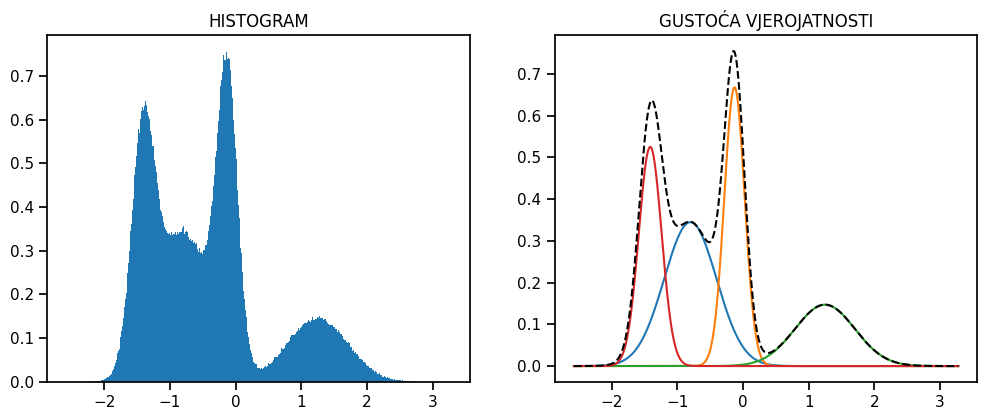

In [58]:
from dists import GMDist

K = 4
L = 1000000

dist = GMDist.random(K)
data = dist.sample(L)
data.sort()

with plot_context(figsize=(12, 4.5), show=True):
    with plot_context(subplot=(1, 2, 1), title="HISTOGRAM"):
        plt.hist(data, bins=500, density=True)  # histogram
    
    with plot_context(subplot=(1, 2, 2), title="GUSTOƒÜA VJEROJATNOSTI"):
        for i in range(K):
            plt.plot(data, dist.pi[i] * dist.p_xz(data, i))  # komponente, pomno≈æene pripadajuƒáim te≈æinama
    
        plt.plot(data, dist.p_x(data), 'k--')  # cijela mje≈°avina

U vjerojatnosnom modeliranju pretpostavlja se da skup podataka $\mathcal D = \q\{ \e x^{(1)}, \e x^{(2)}, \ldots, \e x^{(N)} \w\}$ sadr≈æi realizacije neke sluƒçajne varijable $\e x$.
Prema kriteriju najveƒáe izglednosti (engl. <i>maximum likelihood</i>), pri uƒçenju modela biramo parametre $\e \theta$ koji daju najveƒáu izglednost uz zadani skup podataka.
Uvedemo li dodatnu pretpostavku da svi podatci dolaze kao realizacije iste sluƒçajne varijable (odnosno kolekcije <a href="https://www.wikiwand.com/en/Iid">meƒëusobno nezavisnih i jednako distribuiranih sluƒçajnih varijabli</a>), funkcija izglednosti poprima oblik
\begin{equation}
    \mathcal L\q(\e \theta \cb \mathcal D\w) = p_{\e \theta}\q(\e x^{(1)}, \e x^{(2)}, \ldots, \e x^{(N)}\w) = \prod_{i=1}^N p_{\e \theta}\q(\e x^{(i)}\w).
\end{equation}

Funkcija izglednosti u svom izvornom obliku nezgrapna je za deriviranje, pa se stoga ƒçe≈°ƒáe koristi njezin logaritam (oboje poprima maksimum za istu vrijednost parametara).
K tome je u strojnom uƒçenju uobiƒçajeno <b>minimizirati</b> nekakvu empirijsku mjeru pogre≈°ke koja je suma gubitaka po svim primjerima, pa je zgodno definirati empirijsku pogre≈°ku kao <b>negativan logaritam izglednosti</b>, odnosno
\begin{equation}
    E\q(\e \theta \cb \mathcal D\w) = -\sum_{i=1}^N \log p_{\e \theta}\q(\e x^{(i)}\w),
\end{equation}
iz ƒçega slijedi da je funkcija gubitka za jedan primjer $L_{\e \theta}\q(\e x^{(i)}\w) = -\log p_{\e \theta}\q(\e x^{(i)}\w) $.

---
<b>b)</b>
Dovr≈°ite implementaciju modela Gaussove mje≈°avine `GMDist` iz modula `tf_utils` &mdash; dovr≈°ite sljedeƒáe funkcije:
 - `loss(data)` &mdash; raƒçuna gubitak (ili vektor gubitaka) jednog primjera (ili vektora primjera),
 - `p_xz(x, k)` &mdash; raƒçuna gustoƒáu vjerojatnosti primjera za $k$-tu komponentu, i
 - `p_x(x)` &mdash; raƒçuna gustoƒáu vjerojatnosti primjera;
 
ili napi≈°ite vlastitu implementaciju koristeƒái biblioteku za duboko uƒçenje po ≈æelji (<b>tensorflow</b>, <b>pytorch</b>).
Va≈°u implementaciju ƒáete trebati koristiti u narednim podzadatcima, stoga razmislite o tome da k≈çd izolirate u  klasu ili ga rasporedite kroz nekoliko funkcija.

Parametri modela analogni su parametrima distribucije $\e \pi$, $\e \mu$ i $\e \sigma^2$, no ipak, prilikom pretra≈æivanja prostora parametara gradijentnim spustom ≈æeljeli bismo izbjeƒái ograniƒçenja koja ti parametri moraju zadovoljavati, konkretno:
\begin{align}
    \pi_k &\ge 0, \quad \text{za} \, k = 1, 2, \ldots, K, \\
    \sum_{k=1}^K \pi_k &= 1, \\
    \sigma^2_k &> 0, \quad \text{za} \, k = 1, 2, \ldots, K.
\end{align}
Zato se umjesto vektora te≈æina komponenata $\e \pi$ uƒçi vektor logaritama te≈æina komponenata, $\operatorname{\mathbf{log}} \e \pi$ (varijabla `logpi` u prilo≈æenom kodu), a umjesto vektora varijanci $\e {\sigma^2}$ takoƒëer vektor logaritama varijanci $\operatorname{\mathbf{log}} \e \sigma^2$ (varijabla `logvar` u prilo≈æenom kodu).
Razlog je taj ≈°to logaritmi tih parametara smiju poprimiti bilo koju realnu vrijednost i pritom nisu meƒëusobno vezani.
Te≈æine komponenata dobivaju se natrag primjenom funkcije $\operatorname{\mathbf{softmax}}$: $\e \pi = \operatorname{\mathbf{softmax}}\q(\operatorname{\mathbf{log}}\e \pi\w)$, gdje je
\begin{equation}
    \operatorname{softmax}_k\q(\e x\w) = \frac{\exp x_k}{\sum_{j=1}^K \exp x_j},
\end{equation}
a varijance primjenom funkcije $\operatorname{\mathbf{exp}}$, $\e{\sigma^2} = \operatorname{\mathbf{exp}}\q(\operatorname{\mathbf{log}}\e {\sigma^2}\w)$.

Naposljetku, radi sprjeƒçavanja gubitka preciznosti, kao i radi br≈æeg treniranja, preporuƒçeno je od poƒçetka raditi s negativnim logaritmima gustoƒáe vjerojatnosti (umjesto samim gustoƒáama vjerojatnosti).
U tom sluƒçaju prirodno je definirati gubitke ostalih varijabli, $L_{\e \theta}\q(x^{(i)} \cb z_k\w)$ i $L_{\e \theta}\q(z_k\w)$, kao
\begin{align}
    L_{\e \theta}\q(x^{(i)} \cb z_k\w) &= -\log \mathcal N \q(x; \mu_k, \sigma^2_k\w) = \frac{1}{2} \cdot \q(\log 2\pi + \log \sigma^2 + \frac{\q(x - \mu\w)^2}{\sigma^2}\w), \quad \text{i} \\
    L_{\e \theta}\q(z_k\w) &= -\log \operatorname{softmax}_k \q(\operatorname{\mathbf{log}} \e \pi\w) = \log \sum_{j=1}^K \exp \q(\operatorname{\mathbf{log}} \pi\w)_j - \q(\log \pi\w)_k
\end{align}
pa gubitak primjera $x^{(i)}$ u terminima $L_{\e \theta}\q(x^{(i)} \cb z_k\w)$ i $L_{\e \theta}\q(z_k\w)$ iznosi
\begin{align}
    L_{\e \theta}\q(x^{(i)}\w) &= - \log \sum_{k=1}^K \pi_k \cdot \mathcal N \q(x^{(i)}; \mu_k, \sigma^2_k\w) \\ 
    &= -\log \sum_{k=1}^K \exp \q(-\q( L_{\e \theta}\q(x^{(i)} \cb z_k\w) + L_{\e \theta}\q(z_k\w) \w)\w).
\end{align}
Operacija $\operatorname{LSE}\q(\e x\w) = \log \sum_{k=1}^K \exp x_k$ naziva se <a href="https://www.wikiwand.com/en/LogSumExp">logaritam sume eksponenata</a>. Biblioteke za duboko uƒçenje nude implementaciju te operacije (`tf.reduce_logsumexp`, `torch.logsumexp`) kod koje dolazi do minimalnog gubitka preciznosti.
Poku≈°ajte iskoristiti navedenu operaciju prilikom raƒçunanja pogre≈°ke; ako ba≈° ne ide, izraƒçunajte gustoƒáu vjerojatnosti pa uzmite njezin negativan logaritam.

U nastavku je dan k≈çd koji mo≈æete iskoristiti za treniranje modela.

In [90]:
from models import GMModel

model = GMModel(K)
optimizer = tf.optimizers.Adam(1e-2)

L = 1000
data = dist.sample(L).reshape([-1, 1])
batch_size = 1000
num_epoch = 5000

for epoch in range(num_epoch):
    for i in range(math.ceil(L / batch_size)):
        chunk = data[i * batch_size:(i + 1) * batch_size]
                
        with tf.GradientTape() as tape:
            loss = tf.reduce_mean(model.loss(chunk), axis=0)

        grad = tape.gradient(loss, model.variables)
        optimizer.apply_gradients(zip(grad, model.variables))
    
    display(HTML(f"EPOCH {epoch} / {num_epoch}"), clear=True)

<b>c)</b> Prika≈æite na istom grafu:
1. zadanu funkciju gustoƒáe,
2. nauƒçenu funkciju gustoƒáe, i
3. histogram izvuƒçenog uzorka.

Vidite <a href="slika_2.png">prilo≈æenu sliku</a> za referencu.

<p></p>
Sla≈æe li se nauƒçena gustoƒáa sa zadanom?
Reprezentira li uzorak podataka zadanu distribuciju dovoljno dobro?

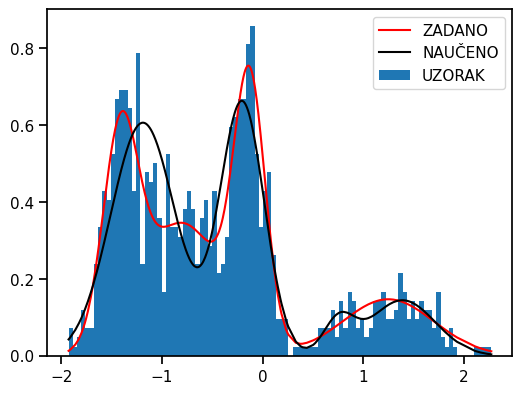

In [153]:
...
data.sort(axis=0)
model.update_inverses()

with plot_context(show=True, legend=["ZADANO", "NAUƒåENO", "UZORAK"]):
    plt.plot(data, dist.p_x(data), 'r-')  # zadana gustoƒáa
    plt.plot(data, model.p_x(data), 'k-')  # nauƒçena gustoƒáa
    plt.hist(data, bins=100, density=True)  # histogram uzorka za uƒçenje
    
#print(np.sum(model_pdf) * delta)

<b>d)</b> Prika≈æite na dva odvojena grafa:
 1. zadanu gustoƒáu vjerojatnosti mje≈°avine i njenih pripadajuƒáih komponenata, i
 2. nauƒçenu gustoƒáu vjerojatnosti mje≈°avine i njenih pripadajuƒáih komponenata.

Odgovaraju li komponente nauƒçene mje≈°avini komponentama iz zadane mje≈°avine?

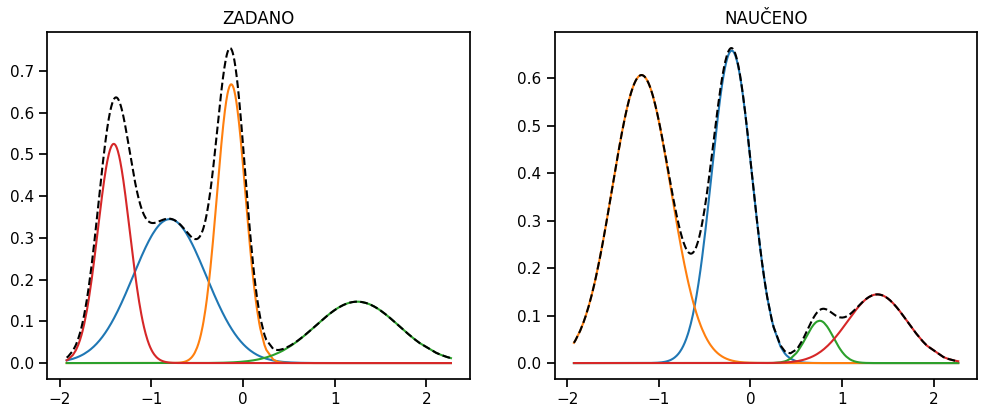

In [156]:
...

with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 1), title="ZADANO"):
        for k in range(K):
            plt.plot(data, dist.pi[k] * dist.p_xz(data, k))  # komponente, pomno≈æene pripadajuƒáim te≈æinama
            
        plt.plot(data, dist.p_x(data), 'k--')  # cijela mje≈°avina
            
    with plot_context(subplot=(1, 2, 2), title="NAUƒåENO"):
        for k in range(model.K):
            plt.plot(data, model.pi[k] * model.p_xz(data, k))  # komponente, pomno≈æene pripadajuƒáim te≈æinama
            
        plt.plot(data, model.p_x(data), 'k--')  # cijela mje≈°avina

<b>e)</b>
Nauƒçeni model mje≈°avine mo≈æe se koristiti i za <b>grupiranje podataka</b> (<i>clustering</i>) u $K$ grupa.
Uvjetna vjerojatnost $p_{\e \theta}\q(z_k \cb \e x\w)$ za $k = 1, 2, \ldots, K$, predstavlja vjerojatnost da primjer $\e x$ dolazi iz $k$-te komponente mje≈°avine i raƒçuna se kao
\begin{equation}
    p_{\e \theta}\q(z_k \cb \e x\w) = \frac{p_{\e \theta}\q(\e x, z_k\w)}{p_{\e \theta}\q(\e x\w)} = \frac{\pi_k \cdot p_{\e \theta}\q(\e x \cb z_k\w)}{\sum_{i=1}^K \pi_i \cdot p_{\e \theta}\q(\e x \cb z_i\w)}.
\end{equation}
Kriterij maksimalne izglednosti daje podjelu skupa podataka $\mathbb X$ na $K$ disjunktnih grupa na sljedeƒái naƒçin:
\begin{equation}
    \mathcal G_k = \q\{ \e x \in \mathbb X \cb \operatorname{arg\,max}_i p_{\e \theta}\q(z_i \cb \e x\w) = k \w\}
\end{equation}

Izvucite uzorak od 1000000 primjera iz prethodno zadane distribucije.
Nacrtajte na $K$ odvojenih grafova histograme pojedinih grupa.
Vidite <a href="slika_3.png">prilo≈æenu sliku</a> za referencu.

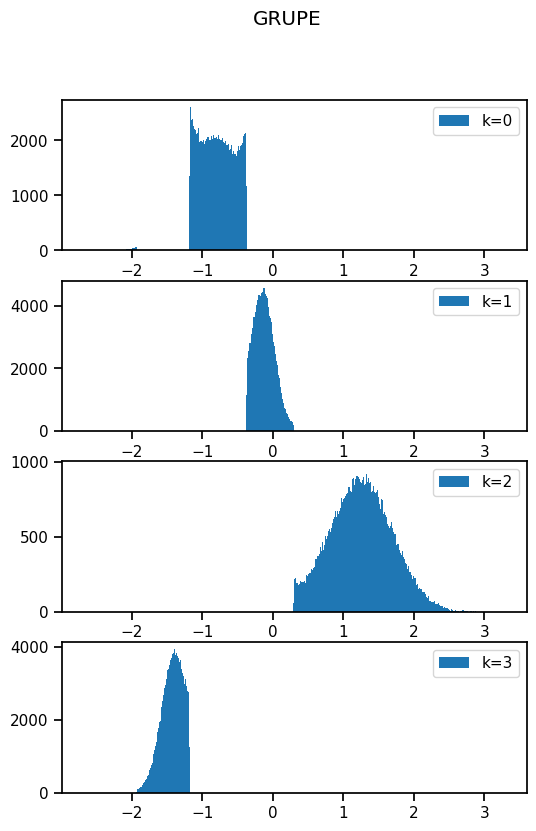

In [166]:
L = 1000000
data = dist.sample(L)
data.sort(axis=0)

_, bins = np.histogram(data, bins=1001)  # ako ≈æelimo imati iste 'ko≈°eve' u svim grafovima: plt.hist(..., bins=bins)

grouped_data = []
for k in range(K):
    grouped_data.append([])

for x in range(L):
    group = np.argmax([dist.p_zx(data[x], k) for k in range(K)], axis=0)
    grouped_data[group].append(data[x])

with plot_context(show=True, figsize=(6, 4.5 * model.K / 2), suptitle="GRUPE"):
    for k in range(K):
        with plot_context(subplot=(model.K, 1, k + 1), legend=[f"k={k}"]):
            plt.hist(grouped_data[k], bins=bins)  # histogram grupe

<b>f)</b>
Implementirajte mje≈°avinu (kontinuiranih) <a href="https://www.wikiwand.com/en/Continuous_uniform_distribution">uniformnih distribucija</a> po uzoru na prilo≈æenu implementaciju Gaussove mje≈°avine.
Mo≈æete dopuniti zadanu klasu `UMDist` ili napisati vlastiti kod po ≈æelji.

Ponovno nacrtajte histogram i graf gustoƒáe vjerojatnosti kao u podzadatku <b>a)</b>.
Koristite <b>2 do 3</b> komponente.
Generirajte neku "zanimljivu" mje≈°avinu koju ƒáete koristiti u sljedeƒáem podzadatku.

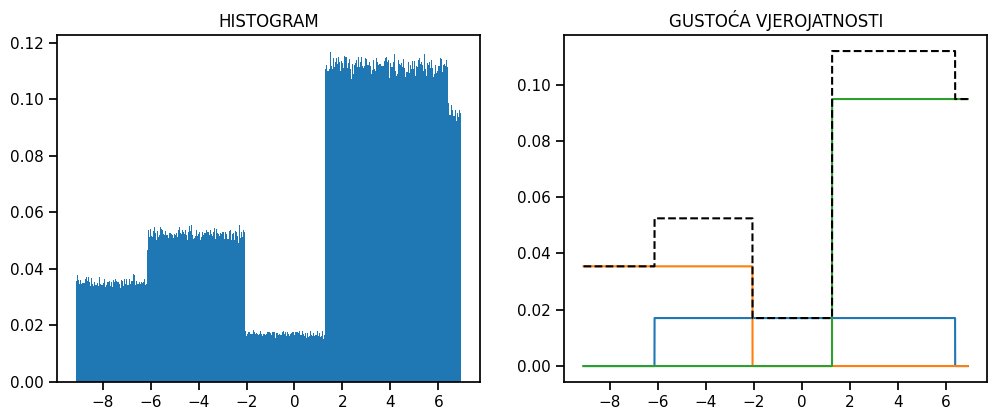

In [208]:
from dists import UMDist

K = 3
L = 1000000

dist = UMDist.random(K)
data = dist.sample(L)
data.sort()

with plot_context(figsize=(12, 4.5), show=True):
    with plot_context(subplot=(1, 2, 1), title="HISTOGRAM"):
        plt.hist(data, bins=500, density=True)  # histogram

    with plot_context(subplot=(1, 2, 2), title="GUSTOƒÜA VJEROJATNOSTI"):
        for i in range(K):
            plt.plot(data, dist.pi[i] * dist.p_xz(data, i))  # komponente, pomno≈æene pripadajuƒáim te≈æinama
    
        plt.plot(data, dist.p_x(data), 'k--')  # cijela mje≈°avina

<b>g)</b>
Zatim iskoristite model Gaussove mje≈°avine da biste nauƒçili prethodno generiranu mje≈°avinu uniformnih distribucija.
Varirajte broj komponenata mje≈°avine <b>modela</b> (ne distribucije) <b>izmeƒëu 3 i 10</b>, te veliƒçinu uzorka za uƒçenje i broj epoha.
U nastavku je dan kod za treniranje.

In [209]:
from models import GMModel

model = GMModel(7)
optimizer = tf.optimizers.Adam(1e-2)

L = 10000
data = dist.sample(L).reshape([-1, 1])
batch_size = 1000
num_epoch = 5000

for epoch in range(num_epoch):
    for i in range(math.ceil(L / batch_size)):
        chunk = data[i * batch_size:(i + 1) * batch_size]
        
        with tf.GradientTape() as tape:
            loss = tf.reduce_mean(model.loss(chunk), axis=0)

        grad = tape.gradient(loss, model.variables)
        optimizer.apply_gradients(zip(grad, model.variables))
    
    display(HTML(f"EPOCH {epoch} / {num_epoch}"), clear=True)

<b>i)</b> Ponovite vizualizacije iz <b>c)</b> i <b>d)</b> podzadataka.
Sla≈æe li se nauƒçena gustoƒáa sa zadanom?
Reprezentira li uzorak podataka zadanu distribuciju dovoljno dobro?
Mo≈æe li model Gaussove mje≈°avine dobro aproksimirati i druge slo≈æene distribucije?

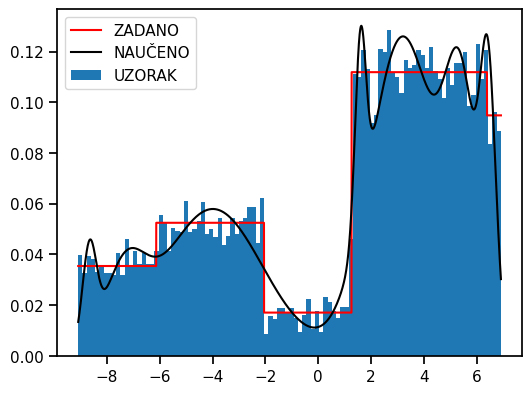

In [210]:
...
data.sort(axis=0)
model.update_inverses()

with plot_context(show=True, legend=["ZADANO", "NAUƒåENO", "UZORAK"]):
    plt.plot(data, dist.p_x(data), 'r-')  # zadana gustoƒáa
    plt.plot(data, model.p_x(data), 'k-')  # nauƒçena gustoƒáa
    plt.hist(data, bins=100, density=True)  # histogram uzorka za uƒçenje
    
#print(np.sum(model_pdf) * delta)

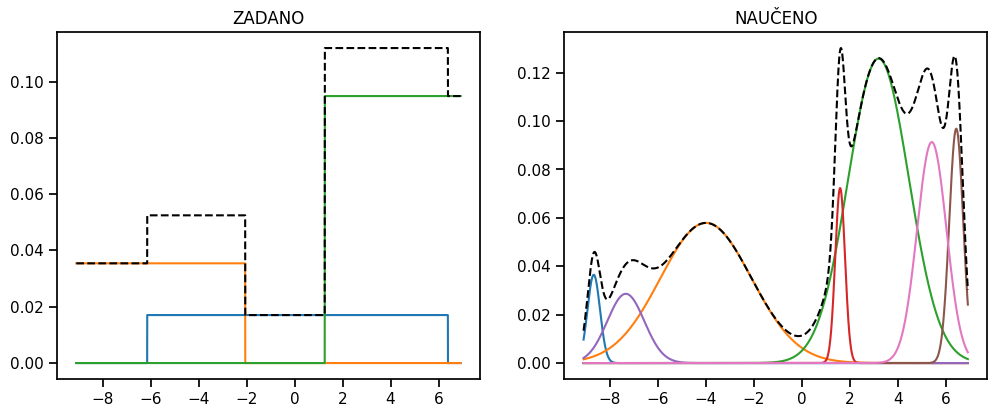

In [211]:
...

with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 1), title="ZADANO"):
        for k in range(K):
            plt.plot(data, dist.pi[k] * dist.p_xz(data, k))  # komponente, pomno≈æene pripadajuƒáim te≈æinama
            
        plt.plot(data, dist.p_x(data), 'k--')  # cijela mje≈°avina
            
    with plot_context(subplot=(1, 2, 2), title="NAUƒåENO"):
        for k in range(model.K):
            plt.plot(data, model.pi[k] * model.p_xz(data, k))  # komponente, pomno≈æene pripadajuƒáim te≈æinama
            
        plt.plot(data, model.p_x(data), 'k--')  # cijela mje≈°avina

## 2. Probabilistiƒçka regresija

U klasiƒçnoj regresiji, raspola≈æemo skupom podataka i njihovih pripadajuƒáih oznaka $\mathcal D = \q\{ \q(\e x^{(i)}, y^{(i)}\w) \w\}$.
Cilj je nauƒçiti funkcijsku ovisnost izmeƒëu podatka $\e x$ i njegove oznake $y$.
Tu funkciju opisujemo neuronskom mre≈æom $f_{\e \theta}$,
\begin{equation}
    y^{(i)} = f_{\e \theta}\q(\e x^{(i)}\w) + \epsilon^{(i)}
\end{equation}
gdje $\e \theta$ oznaƒçava skup svih parametara te mre≈æe, a $\epsilon^{(i)}$ sluƒçajni ≈°um.
≈†um mo≈æe biti <a href="https://www.wikiwand.com/en/Measurement_error">mjerni ≈°um</a>, ali on takoƒëer mo≈æe dolaziti i od neosmotrenih (latentnih) varijabli koje utjeƒçu na oznaku $y^{(i)}$, ali njihove vrijednosti nam nisu poznate, pa je stoga model nepotpun.
Sam ≈°um nije dio modela, veƒá se najbolja toƒçkasta procjena oznake $i$-tog podatka $\hat{y}^{(i)}$ dobiva kao
\begin{equation}
    \hat{y}^{(i)} = f_{\e \theta}\q(\e x^{(i)}\w).
\end{equation}
Definiramo proizvoljnu funkiju gubitka $L_{\e \theta}\q(\hat{y}, y\w)$, najƒçe≈°ƒáe kvadratni $\q(y - \hat{y}\w)^2$ ili apsolutni gubitak $\q\lvert y - \hat{y} \w\rvert$.
Sada se optimalna funkcija $f_{\e \theta}$ mo≈æe pronaƒái minimiziranjem empirijskog gubitka
\begin{equation}
    E\q(\e \theta \cb \mathcal D\w) = \sum_{i = 1}^N L_{\e \theta}\q(\hat{y}^{(i)}, y^{(i)}\w).
\end{equation}

U probabilistiƒçkoj regresiji, oznaku $i$-tog podatka $y^{(i)}$ tretiramo kao realizaciju sluƒçajne varijable $\q. y \cb \e x^{(i)} \w.$.
Zadajemo odgovarajuƒáu parametriziranu distribuciju $p_{\e \theta}\q(y \cb \e x\w)$ kojom ƒáemo opisati te realizacije.
U veƒáini sluƒçajeva to ƒáe biti normalna distribucija $\mathcal N\q(\mu\q(\e x\w), \sigma^2\q(\e x\w)\w)$, ali mo≈æemo zadati i neku drugu.
Nadalje, ≈æelimo odabrati parametre $\e \theta$ za koje je izglednost da generiraju dostupne oznake najveƒáa.
Uz iste pretpostavke kao u prethodnom zadatku, definiramo izglednost
\begin{equation}
    \mathcal L\q(\e \theta \cb \mathcal D\w) = \prod_{i = 1}^N p_{\e \theta}\q(y^{(i)} \cb \e x^{(i)}\w),
\end{equation}
odnosno empirijsku pogre≈°ku
\begin{equation}
    E\q(\e \theta \cb \mathcal D\w) = -\sum_{i = 1}^N \log p_{\e \theta}\q(y^{(i)} \cb \e x^{(i)}\w).
\end{equation}

U ostatku ovog zadatka modelirat ƒáemo podatke u skladu sa sljedeƒáim distribucijama:
\begin{align}
    x &\sim \mathcal N\q(0, 1\w),  \\
    \left. y \, \middle \vert \, x \right. &\sim \mathcal N\left(\mu \left(x\right), \sigma^2\left(x\right) \right).
\end{align}
Funkcije $\mu\q(x\w)$ i $\sigma^2\q(x\w)$ opisat ƒáemo neuronskom mre≈æom.
Parametri $\e \theta$ parametri su te mre≈æe.
Izlaz modela vi≈°e nije toƒçkasta procjena $\hat{y}$, veƒá sluƒçajna varijabla koja nam mo≈æe ne≈°to reƒái i o nesigurnosti procjene, odnosno ≈°umu kojeg klasiƒçna regresija zanemaruje.

---
<b>a)</b>
Proizvoljno definirajte funkcije `mean_y(x)` i `sigma2_y(x)` koje opisuju ovisnost parametara $\mu$ i $\sigma^2$ uvjetne sluƒçajne varijable $\q.y \cb x\w.$ u ovisnosti o realizaciji sluƒçajne varijable $x$.
Napravite funkciju `gen_data(L)` koja generira $L$ uzoraka sluƒçajne varijable $x$ i njima pripadnih oznaka $y$.

Zatim generirajte uzorak veliƒçine $L = 1000$ i odvojeno prika≈æite:
 1. graf intervala pouzdanosti ≈°irine 1-$\sigma$ uvjetne sluƒçajne varijable $\q. y \cb x \w.$ (to je raspon vrijednosti izmeƒëu $\mu - \sigma$ i $\mu + \sigma$),
 2. graf raspr≈°enja generiranog uzorka.

Vidite <a href="slika_4.png">prilo≈æenu sliku</a> za referencu.
Varirajte funkcije `mean_y` i `sigma2_y` tako da dobijete neku "zanimljivu" distribuciju.

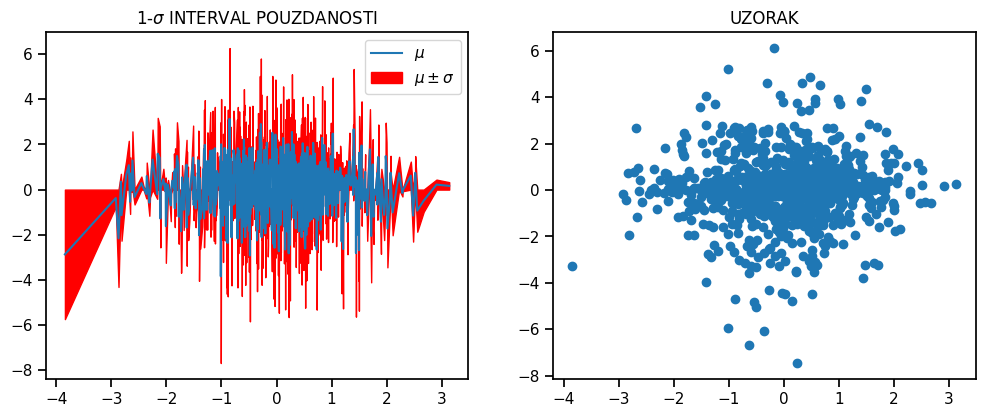

In [294]:
mean_y = lambda x: np.array([_x for _x in x])
#sigma2_y = lambda x: np.array([np.random.normal(loc=0, scale=abs(5 * np.cos(_x)), size=1)[0] for _x in x])
sigma2_y = lambda x: np.array([_x for _x in x])

L = 1000
display_sigma2 = None
display_mean = None

def gen_data(L):
    X = np.random.normal(size=L)
    _mean = mean_y(X)
    _sigma2 = np.abs(sigma2_y(X))
    Y = np.random.normal(loc=_mean, scale=_sigma2, size=L)
        
    return X, Y, _mean, _sigma2

X, Y, display_mean, display_sigma2 = gen_data(L)
X.sort()


with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 1), title="1-$\sigma$ INTERVAL POUZDANOSTI", legend=["$\mu$", "$\mu \pm \sigma$"]):
        plt.plot(X, display_mean)  # srednja vrijednost
        plt.fill_between(X, display_mean - display_sigma2, display_mean + display_sigma2, color="red")  # interval povjerenja

    with plot_context(subplot=(1, 2, 2), title="UZORAK"):
        plt.scatter(X,Y)  # uzorak

<b>b)</b>
Koristite neuronsku mre≈æu za uƒçenje parametara uvjetne sluƒçajne varijable $\q. y \cb x \w.$.
Varirajte broj slojeva mre≈æe <b>izmeƒëu 2 i 5</b> (ne brojeƒái ulazni sloj), te isprobajte razliƒçite kombinacije broja ƒçvorova u skrivenim slojevima.
Po ≈æelji mo≈æete isprobati i razliƒçite aktivacijske funkcije u skrivenim slojevima.
Izlazni sloj mora imati $2$ ƒçvora, te na njega ne smije biti primijenjena aktivacija.
Dovr≈°ite kod za treniranje, pa istrenirajte model nad generiranim uzorkom.

In [368]:
from models import GMModel

model = tf.keras.Sequential([tf.keras.layers.Dense(50, activation="relu"),
                             tf.keras.layers.Dense(250, activation="relu"),
                             tf.keras.layers.Dense(250, activation="relu"),
                             tf.keras.layers.Dense(50, activation="relu"),
                             tf.keras.layers.Dense(2, activation=None)])

optimizer = tf.optimizers.Adam(1e-3)

for _ in range(1000):
    X, Y, _, __ = gen_data(100)
    
    with tf.GradientTape() as tape:
        mean, logvar = tf.split(model(X.reshape([-1, 1])), num_or_size_splits=[1, 1], axis=1)
        
        # ùê∏(ùúΩ|D)=‚àí‚àëN(logùëùùúΩ(ùë¶(ùëñ)|ùíô(ùëñ)))
        loss = GMModel.neglog_normal_pdf(X, mean, logvar)     
        
    grad = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grad, model.trainable_variables))

<b>c)</b> Na dva odvojena grafa prika≈æite interval pouzdanosti ≈°irine 1-$\sigma$ uvjetne sluƒçajne varijable $\q. y \cb x \w.$
 1. zadane distribucije, i
 2. nauƒçenog modela.

Podudaraju li se grafovi?
Mo≈æe li nauƒçeni model generirati nove primjere sliƒçne onima iz skupa za uƒçenje?

4/4 [==============================] - 0s 2ms/step


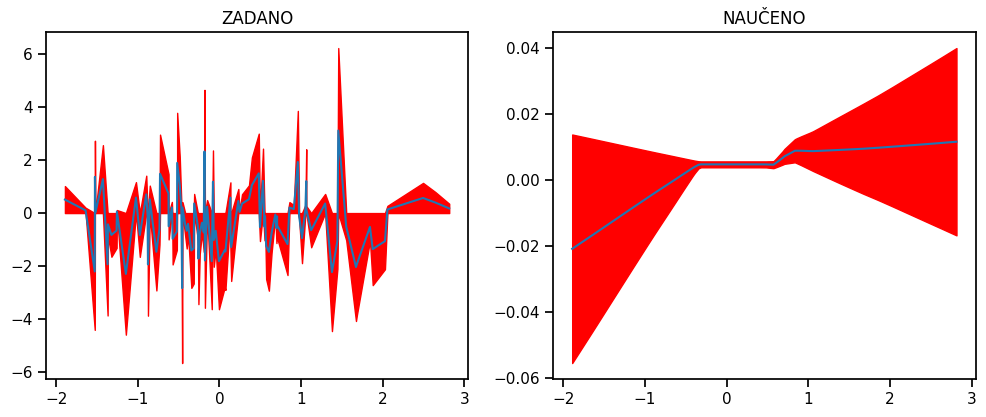

In [369]:
...
X.sort()

with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 1), title="ZADANO"):
        plt.plot(X, display_mean)  # srednja vrijednost
        plt.fill_between(X, display_mean - display_sigma2, display_mean + display_sigma2, color="red")  # interval povjerenja
        
    with plot_context(subplot=(1, 2, 2), title="NAUƒåENO"):
        mean, logvar = tf.split(model.predict(X), num_or_size_splits=[1, 1], axis=1)
        mean = tf.reshape(mean, [-1, 100])[0]
        logvar = tf.reshape(logvar, [-1, 100])[0]
        plt.plot(X, mean)  # srednja vrijednost
        plt.fill_between(X, mean-logvar, mean+logvar, color="red")  # interval pouzdanosti

<b>d)</b>
Za usporedbu istrenirajte i klasiƒçan model regresije uz kvadratni ili apsolutni gubitak, pa na dva odvojena grafa prika≈æite:
 1. interval pouzdanosti ≈°irine 1-$\sigma$ uvjetne sluƒçajne varijable $\q. y \cb x \w.$ zadane distribucije, i
 2. toƒçkastu procjenu oznake $\hat{y}$ koju daje model i graf raspr≈°enja uzorka veliƒçine $L = 100$.

Pogaƒëa li procjena modela pribli≈æno toƒçke u grafu raspr≈°enja?

In [370]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1, activation=None)])

optimizer = tf.optimizers.Adam(1e-3)

for _ in range(1000):
    X, Y, _, __ = gen_data(100)
    
    with tf.GradientTape() as tape:
        y_hat = model(X.reshape([-1, 1]))
        loss = (Y - y_hat)**2
        
    grad = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grad, model.trainable_variables))

4/4 [==============================] - 0s 2ms/step


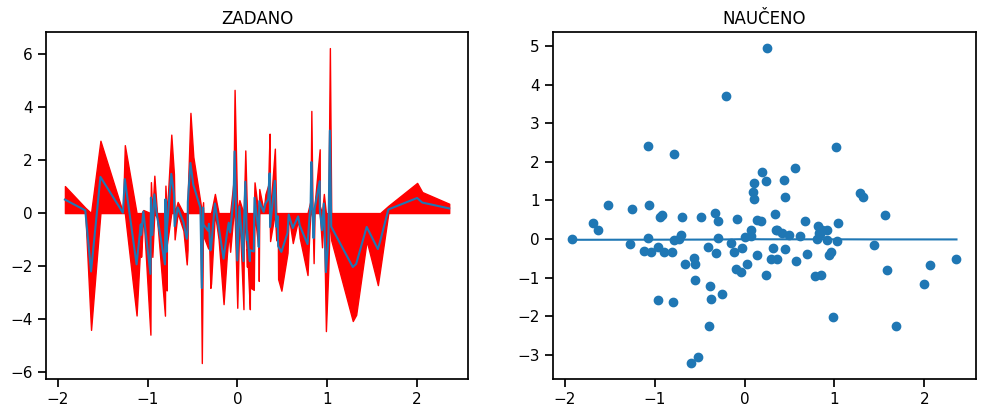

In [371]:
...

X, Y, _, __ = gen_data(100)
X.sort()

with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 1), title="ZADANO"):
        plt.plot(X, display_mean)  # srednja vrijednost
        plt.fill_between(X, display_mean - display_sigma2, display_mean + display_sigma2, color="red")  # interval povjerenja
        
    with plot_context(subplot=(1, 2, 2), title="NAUƒåENO"):
        y_hat = model.predict(X)
        plt.plot(X, y_hat)  # srednja vrijednost
        plt.scatter(X, Y)  # uzorak